In [3]:
from controlnet_aux.midas import MidasDetector 
import torch 

c:\Users\gabri\anaconda3\envs\brain-decoding\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np
from PIL import Image

In [18]:
sub = 1
image_path = 'processed_data/subj{:02d}/nsd_test_stim_sub{}.npy'.format(sub,sub) 
data = np.load(image_path)

[[[ 99.  95.  29.]
  [ 62.  56.   9.]
  [ 47.  50.  12.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[ 69.  62.  44.]
  [ 79.  76.  47.]
  [ 61.  64.  32.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [255. 255. 255.]]

 [[ 25.  26.   0.]
  [ 43.  44.  23.]
  [ 29.  33.  10.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [255. 255. 255.]]

 ...

 [[137. 100.  70.]
  [128. 111.  76.]
  [108. 115.  77.]
  ...
  [143. 104.  61.]
  [150. 109.  69.]
  [152. 116.  71.]]

 [[154. 114.  79.]
  [168. 135.  97.]
  [105.  92.  59.]
  ...
  [161. 120.  72.]
  [146. 108.  61.]
  [132.  99.  50.]]

 [[150.  98.  61.]
  [180. 129.  86.]
  [139. 105.  61.]
  ...
  [143.  94.  57.]
  [133.  83.  54.]
  [146. 115.  76.]]]
(425, 425, 3)
float64
(425, 425)


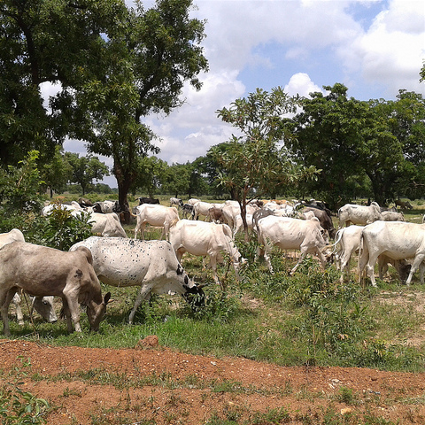

In [19]:
print(data[0])
print(data[0].shape)
print(data[0].dtype)
img = Image.fromarray(data[0].astype(np.uint8))
print(img.size)
img

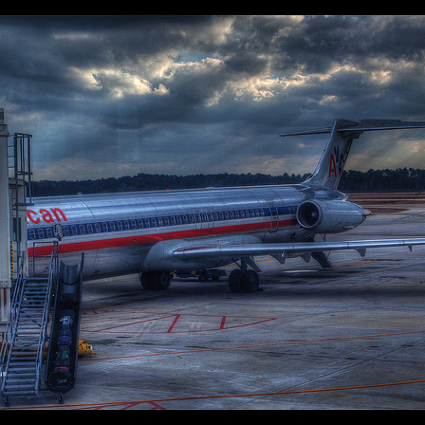

In [20]:
img = Image.fromarray(data[1].astype(np.uint8))
img

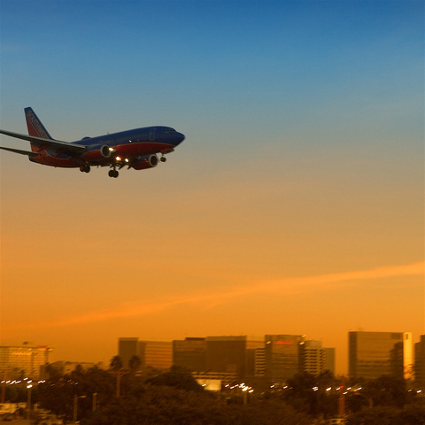

In [21]:
img = Image.fromarray(data[2].astype(np.uint8))
img

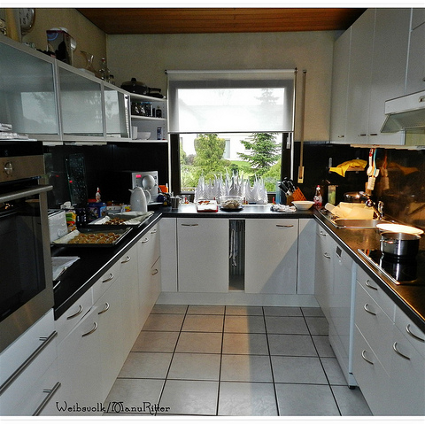

In [22]:
img = Image.fromarray(data[3].astype(np.uint8))
img

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [8]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

1
0
NVIDIA GeForce RTX 4070 Laptop GPU


In [9]:
midas_depth = MidasDetector.from_pretrained(
  "valhalla/t2iadapter-aux-models", filename="dpt_large_384.pt", model_type="dpt_large"
).to("cuda")

(512, 512)


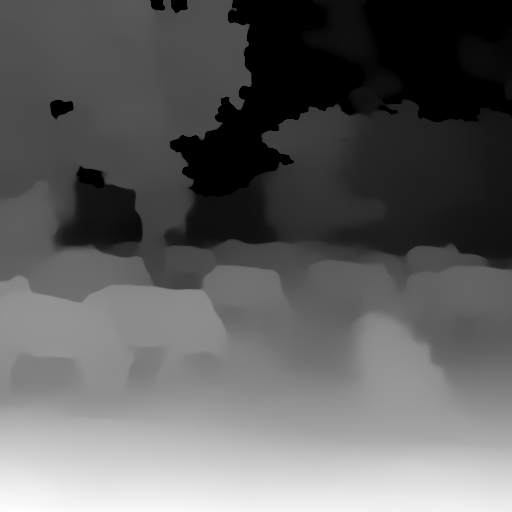

In [10]:
# making input and output resolution the same as original stimulus images size (425 x 425) results in 448 x 448 image  
# getting 512 x 512 depth images immediately during this step since stimulus images will get resized to 512 x 512 anyway 
depth_img = midas_depth(
  img, detect_resolution=512, image_resolution=512
)

print(depth_img.size)
depth_img

In [11]:
depth_img_arr = midas_depth(
  data[0].astype(np.uint8), detect_resolution=425, image_resolution=64
)

type(depth_img_arr)
print(depth_img_arr.dtype)
print(depth_img_arr.shape)

uint8
(64, 64, 3)


In [13]:
depth_stim_array = np.zeros((1,64,64,3))
depth_stim_array[0] = depth_img_arr.astype(np.float64)
print(depth_stim_array[0].shape, depth_stim_array[0].dtype)

(64, 64, 3) float64


In [23]:
sub = 1
dp_image_path = 'processed_data/subj{:02d}/nsd_test_depth_stim_sub{}.npy'.format(sub,sub) 
dp_data = np.load(dp_image_path)

[[[ 76  76  76]
  [ 76  76  76]
  [ 76  76  76]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 76  76  76]
  [ 76  76  76]
  [ 77  77  77]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 75  75  75]
  [ 76  76  76]
  [ 77  77  77]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [227 227 227]
  [226 226 226]
  [226 226 226]]

 [[246 246 246]
  [246 246 246]
  [247 247 247]
  ...
  [234 234 234]
  [233 233 233]
  [233 233 233]]

 [[251 251 251]
  [251 251 251]
  [252 252 252]
  ...
  [241 241 241]
  [240 240 240]
  [240 240 240]]]
(64, 64, 3)
uint8
(64, 64)


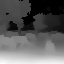

In [30]:
print(dp_data[0])
print(dp_data[0].shape)
print(dp_data[0].dtype)
dp_img = Image.fromarray(dp_data[0].astype(np.uint8))
print(img.size)
dp_img

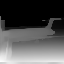

In [32]:
dp_img = Image.fromarray(dp_data[1].astype(np.uint8))
dp_img

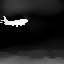

In [27]:
dp_img = Image.fromarray(dp_data[2].astype(np.uint8))
dp_img

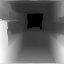

In [28]:
dp_img = Image.fromarray(dp_data[3].astype(np.uint8))
dp_img